
📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

📉 Null Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

📌 Descriptive Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26

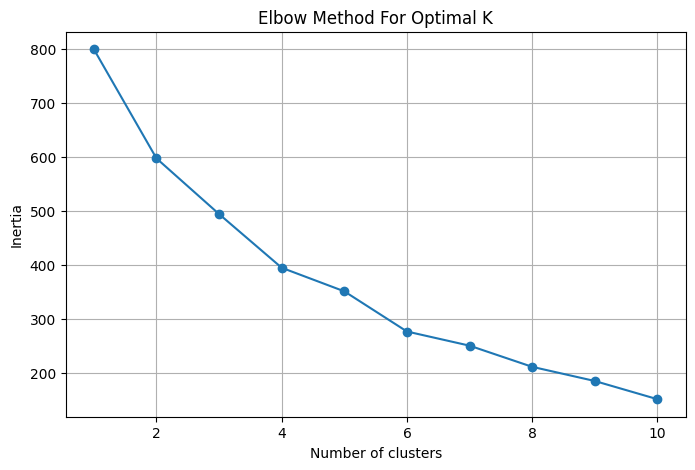

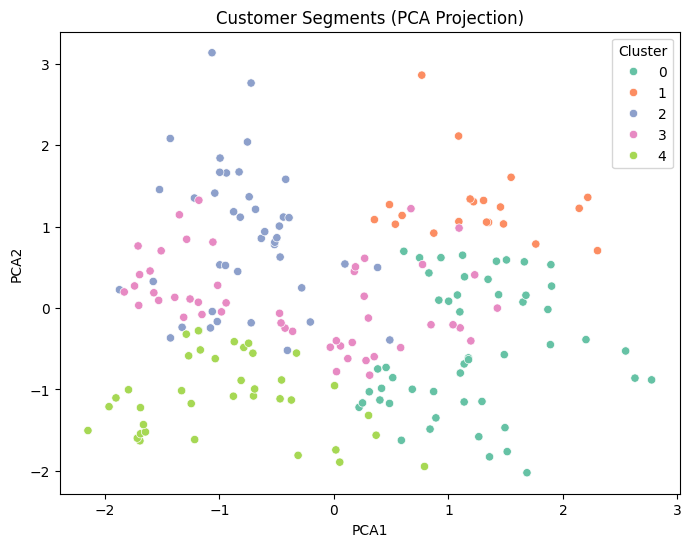


Silhouette Score: 0.27


In [2]:
# 📊 Task 8: Customer Segmentation using K-Means Clustering

# ✅ Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ✅ Step 2: Load Dataset
df = pd.read_csv("Mall_Customers.csv")  # Update path if needed
df.head()

# ✅ Step 3: Exploratory Data Analysis (EDA)
print("\n📊 Dataset Info:")
print(df.info())
print("\n📉 Null Values:")
print(df.isnull().sum())
print("\n📌 Descriptive Statistics:")
print(df.describe())

# ✅ Step 4: Preprocessing
X = df.drop(columns=['CustomerID'])
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Step 5: Elbow Method to Find Optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.savefig("elbow_method.png")
plt.show()

# ✅ Step 6: KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# ✅ Step 7: Visualize Clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Customer Segments (PCA Projection)")
plt.savefig("kmeans_clusters.png")
plt.show()

# ✅ Step 8: Evaluation - Silhouette Score
score = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {score:.2f}")